# Summary
* Baseline LinearSVC results
* C=1.0 (default)
* Accuracy = 58 %
* With classification report, confusion matrices and cross validation


## Load Data

In [1]:
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.utils import shuffle

dataframe = pd.read_csv('../URL_Classification.csv', header=None)
dataframe.columns = ["index", "url", "label"]

## Preprocessing

In [2]:
dataframe['url'] = dataframe['url'].apply(lambda x: np.str_(x))

## Prepare labels

In [3]:
labels = set(dataframe['label'])
label2id = {l: n for n, l in enumerate(labels)}
dataframe['label'] = dataframe['label'].map(label2id)

## Transform with count vectorizer

In [4]:
count_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = count_vectorizer.fit_transform(dataframe['url'])
y = dataframe['label'].values

X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Fit SVM

In [5]:
# clf = sklearn.linear_model.SGDClassifier(class_weight='balanced', loss='hinge', n_jobs=-1, alpha=1.8505070644749287e-05)
clf = sklearn.svm.LinearSVC(class_weight='balanced')
start = time.time()
clf.fit(X_train, y_train)
print(f'\nTraining Time: {time.time()-start}')


Training Time: 1981.6031007766724


/home/kirz/anaconda/envs/url-classification/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Classification report

In [6]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57     12165
           1       0.58      0.56      0.57     21953
           2       0.55      0.58      0.56     47714
           3       0.66      0.63      0.64     48735
           4       0.61      0.57      0.59     11488
           5       0.70      0.69      0.69     20215
           6       0.65      0.63      0.64     50720
           7       0.33      0.35      0.34      1845
           8       0.38      0.41      0.39     19278
           9       0.53      0.56      0.54     23422
          10       0.60      0.58      0.59      5737
          11       0.53      0.58      0.55     11701
          12       0.50      0.49      0.50     21362
          13       0.38      0.36      0.37      9273
          14       0.72      0.68      0.70      6988

    accuracy                           0.58    312596
   macro avg       0.55      0.55      0.55    312596
weighted avg       0.58   

## Confusion matrices

Normalize: true:


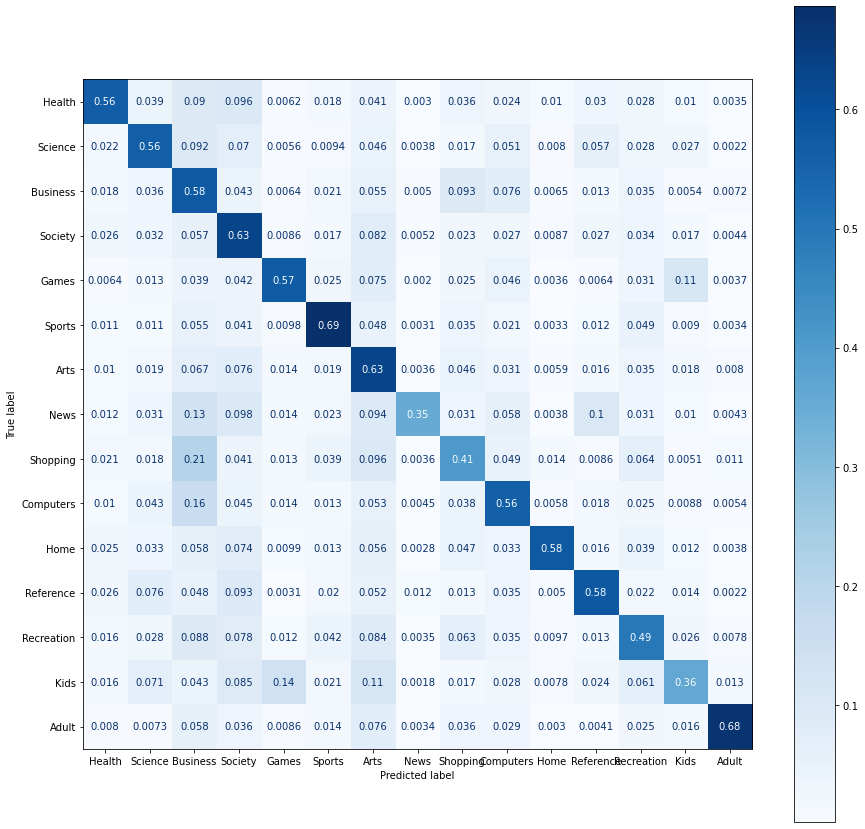

Normalize: pred:


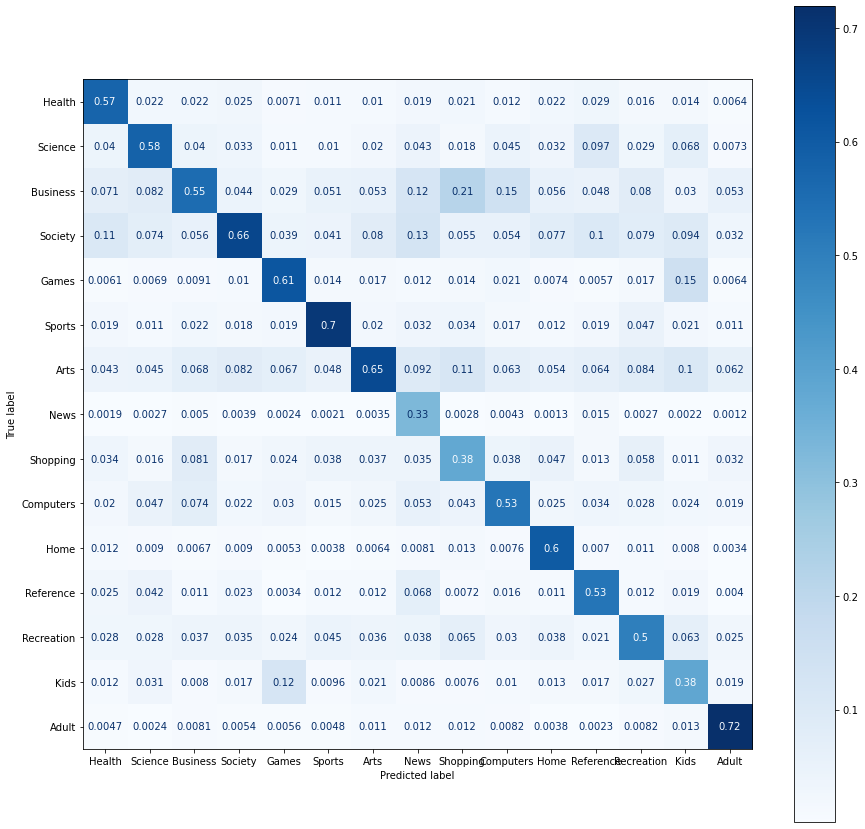

Normalize: None:


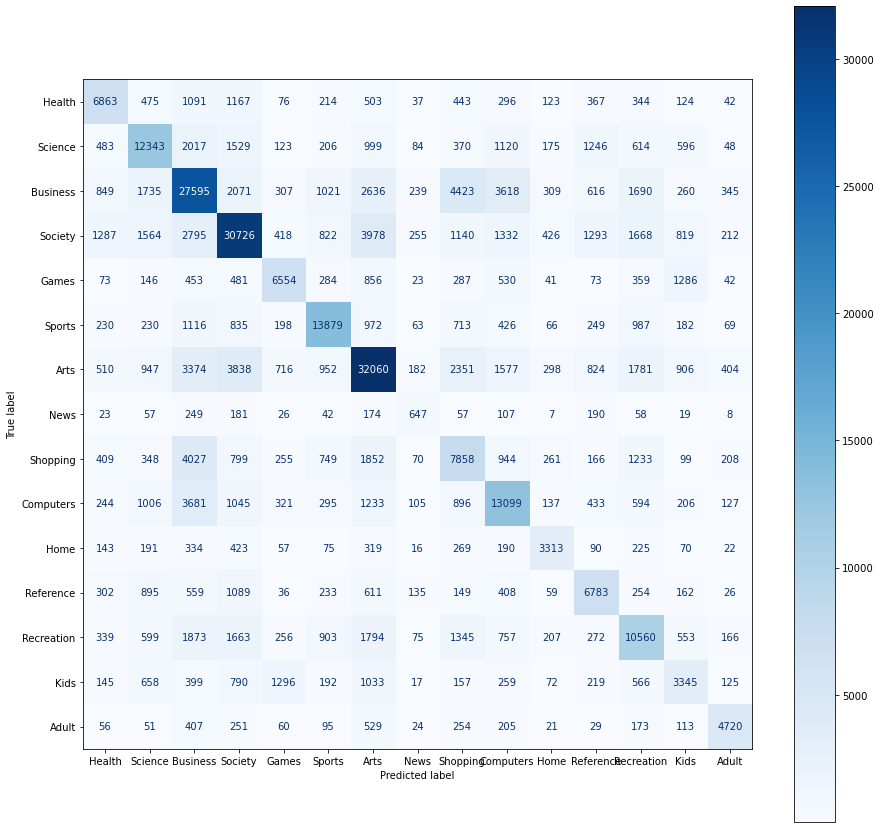

In [7]:
for norm in ['true', 'pred', None]:
    print(f'Normalize: {norm}:')
    _, ax = plt.subplots(figsize=(15,15))
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=norm,
        ax=ax
    )
    plt.show()

# Cross validation

In [8]:
print(cross_val_score(clf, X, y, cv=3))

/home/kirz/anaconda/envs/url-classification/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kirz/anaconda/envs/url-classification/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kirz/anaconda/envs/url-classification/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.57333976 0.5746392  0.57411822]
